Questions to consider:
1. what features affects the sale of hdb
2. do different features fetch different sales
3. are there any 2 or more features that will fetch a higher sales px
4. are there any 2 or more features that will decrease the sales px
5. are there any features that suffer from multicolinearity


In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('../datasets/train.csv',low_memory=False)
df.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  ...  vacancy  \
0     10 TO 12            90.0     Model A                 2006  ...       78   
1     07 TO 09           130.0    Improved                 1987  ...       45   
2     13 TO 15           144.0   Apartment                 1997  ...       39   
3     01 TO 05           103.0     Model A                 1992  ...       20   
4     01 TO 03            83.0  Simplified                 1987  ...       74   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   
1                    1          1.349783         103.854529   
2                    0          1.345245         103.756265   
3                    1          1.354789         103.844934   
4                    0          1.416280         103.838798   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   
2            180.074558             Yusof Ishak Secondary School   
3            389.515528                     Catholic High School   
4            312.025435             Orchid Park Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224           0         1.317659         103.882504  
1           232           0         1.350110         103.854892  
2           188           0         1.342334         103.760013  
3           253           1         1.354789         103.844934  
4           208           0         1.414888         103.838335  

[5 rows x 78 columns]

In [3]:
pd.set_option('display.max_rows',78)
df.dtypes

id                             int64
Tranc_YearMonth               object
town                          object
flat_type                     object
block                         object
street_name                   object
storey_range                  object
floor_area_sqm               float64
flat_model                    object
lease_commence_date            int64
resale_price                 float64
Tranc_Year                     int64
Tranc_Month                    int64
mid_storey                     int64
lower                          int64
upper                          int64
mid                            int64
full_flat_type                object
address                       object
floor_area_sqft              float64
price_per_sqft               float64
hdb_age                        int64
max_floor_lvl                  int64
year_completed                 int64
residential                   object
commercial                    object
market_hawker                 object
m

In [4]:
df['residential'] = df['residential'].map({'Y':1,'N':0})

In [5]:
df['commercial'] = df['commercial'].map({'Y':1,'N':0})

In [6]:
df['market_hawker'] = df['market_hawker'].map({'Y':1,'N':0})

In [7]:
df['multistorey_carpark'] = df['multistorey_carpark'].map({'Y':1,'N':0})

In [8]:
df['precinct_pavilion'] = df['precinct_pavilion'].map({'Y':1,'N':0})

In [9]:
df[['residential']]


residential
0                 1
1                 1
2                 1
3                 1
4                 1
...             ...
150629            1
150630            1
150631            1
150632            1
150633            1

[150634 rows x 1 columns]

In [10]:
df.dtypes

id                             int64
Tranc_YearMonth               object
town                          object
flat_type                     object
block                         object
street_name                   object
storey_range                  object
floor_area_sqm               float64
flat_model                    object
lease_commence_date            int64
resale_price                 float64
Tranc_Year                     int64
Tranc_Month                    int64
mid_storey                     int64
lower                          int64
upper                          int64
mid                            int64
full_flat_type                object
address                       object
floor_area_sqft              float64
price_per_sqft               float64
hdb_age                        int64
max_floor_lvl                  int64
year_completed                 int64
residential                    int64
commercial                     int64
market_hawker                  int64
m

In [13]:
df.shape

(150634, 78)

In [14]:
df.isnull().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
price_per_sqft                   0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion   

In [15]:
df.shape

(150634, 78)

In [16]:
#drop columns/features that have the most null values
df.drop(columns=['Tranc_YearMonth','mid_storey','Hawker_Within_500m','Mall_Within_2km','Mall_Within_1km','Mall_Within_500m','Hawker_Within_2km','Hawker_Within_1km','Hawker_Within_500m'],inplace=True)

In [17]:
df.shape

(150634, 70)

In [18]:
df.isnull().sum()

id                             0
town                           0
flat_type                      0
block                          0
street_name                    0
storey_range                   0
floor_area_sqm                 0
flat_model                     0
lease_commence_date            0
resale_price                   0
Tranc_Year                     0
Tranc_Month                    0
lower                          0
upper                          0
mid                            0
full_flat_type                 0
address                        0
floor_area_sqft                0
price_per_sqft                 0
hdb_age                        0
max_floor_lvl                  0
year_completed                 0
residential                    0
commercial                     0
market_hawker                  0
multistorey_carpark            0
precinct_pavilion              0
total_dwelling_units           0
1room_sold                     0
2room_sold                     0
3room_sold

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(149805, 70)

In [21]:
df.isnull().sum()

id                           0
town                         0
flat_type                    0
block                        0
street_name                  0
storey_range                 0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
resale_price                 0
Tranc_Year                   0
Tranc_Month                  0
lower                        0
upper                        0
mid                          0
full_flat_type               0
address                      0
floor_area_sqft              0
price_per_sqft               0
hdb_age                      0
max_floor_lvl                0
year_completed               0
residential                  0
commercial                   0
market_hawker                0
multistorey_carpark          0
precinct_pavilion            0
total_dwelling_units         0
1room_sold                   0
2room_sold                   0
3room_sold                   0
4room_sold                   0
5room_so

In [22]:
df.dtypes

id                             int64
town                          object
flat_type                     object
block                         object
street_name                   object
storey_range                  object
floor_area_sqm               float64
flat_model                    object
lease_commence_date            int64
resale_price                 float64
Tranc_Year                     int64
Tranc_Month                    int64
lower                          int64
upper                          int64
mid                            int64
full_flat_type                object
address                       object
floor_area_sqft              float64
price_per_sqft               float64
hdb_age                        int64
max_floor_lvl                  int64
year_completed                 int64
residential                    int64
commercial                     int64
market_hawker                  int64
multistorey_carpark            int64
precinct_pavilion              int64
t

In [23]:
df.select_dtypes(include=['object']).columns
 

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'full_flat_type', 'address', 'postal', 'planning_area',
       'mrt_name', 'bus_stop_name', 'pri_sch_name', 'sec_sch_name'],
      dtype='object')

In [24]:
df.select_dtypes(exclude=['object']).columns

Index(['id', 'floor_area_sqm', 'lease_commence_date', 'resale_price',
       'Tranc_Year', 'Tranc_Month', 'lower', 'upper', 'mid', 'floor_area_sqft',
       'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'Latitude', 'Longitude', 'Mall_Nearest_Distance',
       'Hawker_Nearest_Distance', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'bus_interchange', 'mrt_interchange',
       'mrt_latitude', 'mrt_longitude', 'bus_stop_nearest_distance',
       'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_nearest_distance',
       'vacancy', 'pri_sch_affiliation', 'pri_sch_latitude',
       'pri_sch_longitude', '

In [50]:
#find out features w multicollinearity

X = df[['floor_area_sqm', 'lease_commence_date', 'resale_price',
       'Tranc_Year', 'Tranc_Month', 'lower', 'upper', 'mid', 'floor_area_sqft',
       'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'Latitude', 'Longitude', 'Mall_Nearest_Distance',
       'Hawker_Nearest_Distance', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'bus_interchange', 'mrt_interchange',
       'mrt_latitude', 'mrt_longitude', 'bus_stop_nearest_distance',
       'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_nearest_distance',
       'vacancy', 'pri_sch_affiliation', 'pri_sch_latitude',
       'pri_sch_longitude', 'sec_sch_nearest_dist', 'cutoff_point',
       'affiliation', 'sec_sch_latitude', 'sec_sch_longitude']]

# # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# # calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
					for i in range(len(X.columns))]

/Users/elizahambali/opt/anaconda3/envs/dsi-sg/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/elizahambali/opt/anaconda3/envs/dsi-sg/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [79]:
vif=vif_data.round(1)
vif

feature     VIF
0              floor_area_sqm     inf
1         lease_commence_date     inf
2                resale_price    42.5
3                  Tranc_Year     1.3
4                 Tranc_Month     1.0
5                       lower     inf
6                       upper     inf
7                         mid     inf
8             floor_area_sqft     inf
9              price_per_sqft    27.0
10                    hdb_age     inf
11              max_floor_lvl     3.6
12             year_completed    48.6
13                residential     0.0
14                 commercial     1.1
15              market_hawker     1.0
16        multistorey_carpark     1.0
17          precinct_pavilion     1.1
18       total_dwelling_units     inf
19                 1room_sold     inf
20                 2room_sold     inf
21                 3room_sold     inf
22                 4room_sold     inf
23                 5room_sold     inf
24                  exec_sold     inf
25              multigen_sold     inf
26      studio_apartment_sold     inf
27               1room_rental     inf
28               2room_rental     inf
29               3room_rental     inf
30          other_room_rental     inf
31                   Latitude  3055.2
32                  Longitude  8863.4
33      Mall_Nearest_Distance     1.4
34    Hawker_Nearest_Distance     2.0
35         hawker_food_stalls     1.3
36       hawker_market_stalls     1.7
37       mrt_nearest_distance     1.3
38            bus_interchange     1.5
39            mrt_interchange     1.5
40               mrt_latitude    87.9
41              mrt_longitude   175.3
42  bus_stop_nearest_distance     1.0
43          bus_stop_latitude  2808.9
44         bus_stop_longitude  8127.4
45   pri_sch_nearest_distance     1.3
46                    vacancy     1.2
47        pri_sch_affiliation     1.1
48           pri_sch_latitude   240.7
49          pri_sch_longitude   738.9
50       sec_sch_nearest_dist     1.2
51               cutoff_point     1.4
52                affiliation     1.4
53           sec_sch_latitude   141.6
54          sec_sch_longitude   453.6

In [78]:
vif.dtypes

feature     object
VIF        float64
dtype: object

In [86]:
#drop infinite values by replacing with NaN first
vif.replace([np.inf],np.nan,inplace=True)
vif.dropna(inplace=True)
vif

feature     VIF
2                resale_price    42.5
3                  Tranc_Year     1.3
4                 Tranc_Month     1.0
9              price_per_sqft    27.0
11              max_floor_lvl     3.6
12             year_completed    48.6
13                residential     0.0
14                 commercial     1.1
15              market_hawker     1.0
16        multistorey_carpark     1.0
17          precinct_pavilion     1.1
31                   Latitude  3055.2
32                  Longitude  8863.4
33      Mall_Nearest_Distance     1.4
34    Hawker_Nearest_Distance     2.0
35         hawker_food_stalls     1.3
36       hawker_market_stalls     1.7
37       mrt_nearest_distance     1.3
38            bus_interchange     1.5
39            mrt_interchange     1.5
40               mrt_latitude    87.9
41              mrt_longitude   175.3
42  bus_stop_nearest_distance     1.0
43          bus_stop_latitude  2808.9
44         bus_stop_longitude  8127.4
45   pri_sch_nearest_distance     1.3
46                    vacancy     1.2
47        pri_sch_affiliation     1.1
48           pri_sch_latitude   240.7
49          pri_sch_longitude   738.9
50       sec_sch_nearest_dist     1.2
51               cutoff_point     1.4
52                affiliation     1.4
53           sec_sch_latitude   141.6
54          sec_sch_longitude   453.6

In [94]:
vif2 = vif[vif.VIF < 5]
vif2['feature']

3                    Tranc_Year
4                   Tranc_Month
11                max_floor_lvl
13                  residential
14                   commercial
15                market_hawker
16          multistorey_carpark
17            precinct_pavilion
33        Mall_Nearest_Distance
34      Hawker_Nearest_Distance
35           hawker_food_stalls
36         hawker_market_stalls
37         mrt_nearest_distance
38              bus_interchange
39              mrt_interchange
42    bus_stop_nearest_distance
45     pri_sch_nearest_distance
46                      vacancy
47          pri_sch_affiliation
50         sec_sch_nearest_dist
51                 cutoff_point
52                  affiliation
Name: feature, dtype: object

In [ ]:
sns.pairplot(df, y_vars=['floor_area_sqm', 'floor_area_sqft', 'price_per_sqft', 'year_completed', 'lease_commence_date','hdb_age'], x_vars=['resale_price'])

In [95]:
features = ['Tranc_Year','Tranc_Month','max_floor_lvl','residential','commercial','market_hawker','multistorey_carpark','precinct_pavilion','Mall_Nearest_Distance','Hawker_Nearest_Distance']

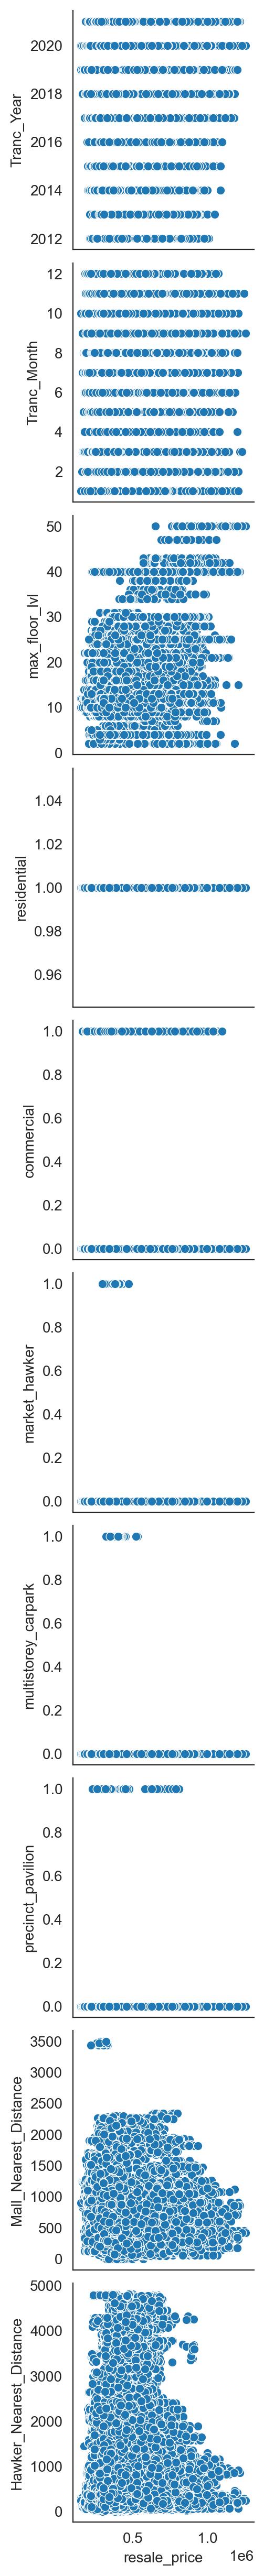

In [97]:
sns.pairplot(df, y_vars=features, x_vars=['resale_price'])

In [108]:
df_filtered_vif = df.filter(items=['resale_price','Tranc_Year','Tranc_Month','max_floor_lvl','residential','commercial','market_hawker','multistorey_carpark','precinct_pavilion','Mall_Nearest_Distance','Hawker_Nearest_Distance'])

df_filtered_vif.head()

resale_price  Tranc_Year  Tranc_Month  max_floor_lvl  residential  \
0      680000.0        2016            5             25            1   
1      665000.0        2012            7              9            1   
2      838000.0        2013            7             16            1   
3      550000.0        2012            4             11            1   
4      298000.0        2017           12              4            1   

   commercial  market_hawker  multistorey_carpark  precinct_pavilion  \
0           0              0                    0                  0   
1           0              0                    0                  0   
2           0              0                    0                  0   
3           1              0                    0                  0   
4           0              0                    0                  0   

   Mall_Nearest_Distance  Hawker_Nearest_Distance  
0            1094.090418               154.753357  
1             866.941448               640.151925  
2            1459.579948              1762.082341  
3             950.175199               726.215262  
4             729.771895              1540.151439

In [ ]:
df_filtered_vif.hist

<AxesSubplot: >

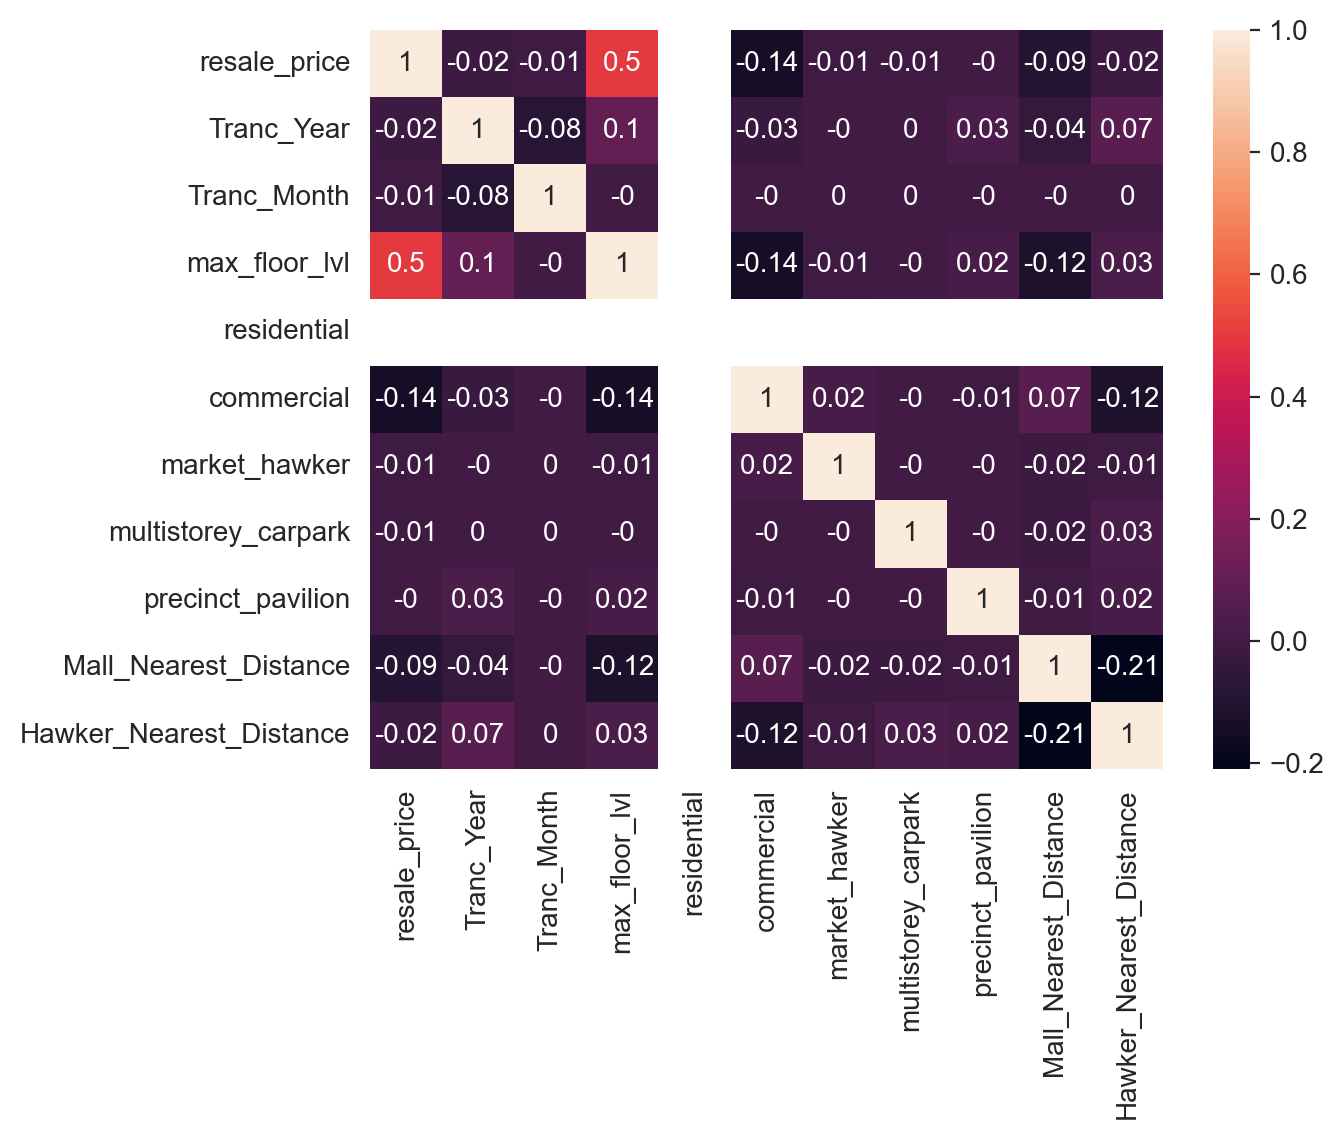

In [109]:
corr_matrix = df_filtered_vif.corr().round(2)
sns.heatmap(data=corr_matrix, annot = True)


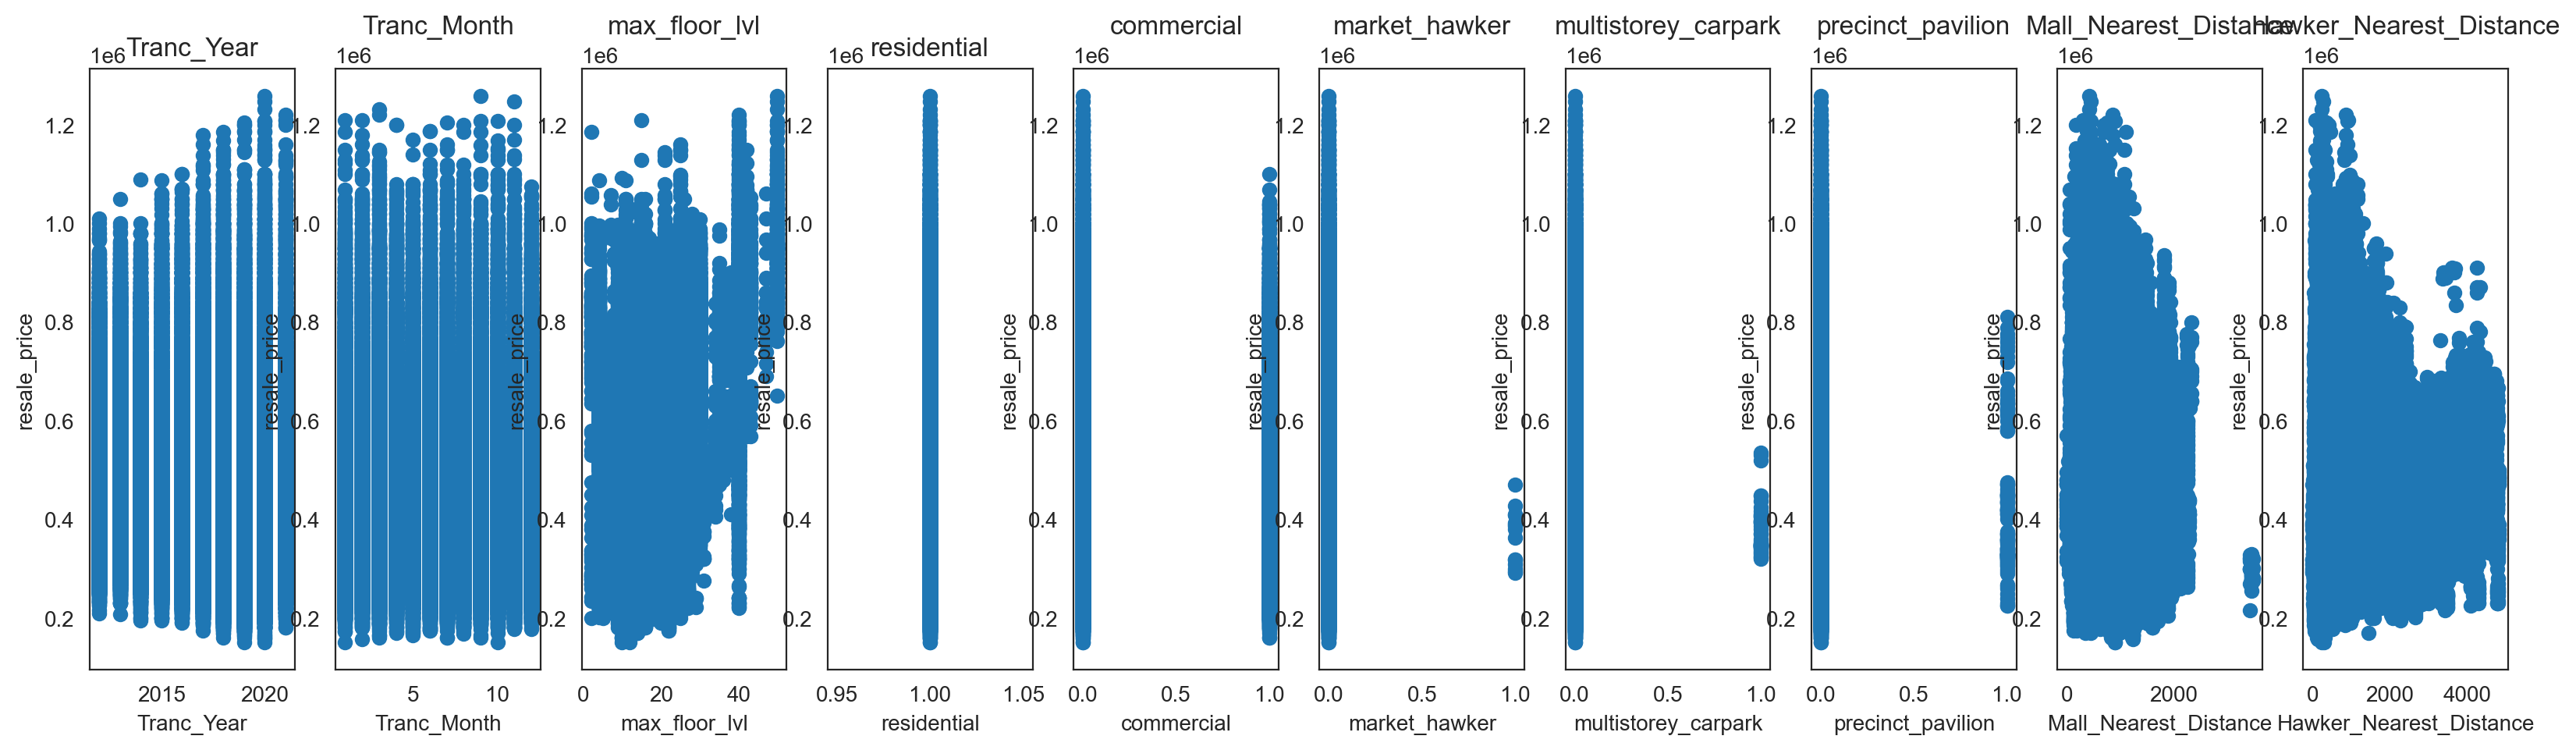

In [118]:
plt.figure(figsize=(20,5))

features = ['Tranc_Year','Tranc_Month','max_floor_lvl','residential','commercial','market_hawker',
            'multistorey_carpark','precinct_pavilion','Mall_Nearest_Distance','Hawker_Nearest_Distance']
target = df_filtered_vif['resale_price']

for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    x=df_filtered_vif[col]
    y=target
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('resale_price')

In [ ]:
plt.figure(figsize=(20,5))

features = ['Tranc_Year','Tranc_Month','max_floor_lvl','residential','commercial','market_hawker',
            'multistorey_carpark','precinct_pavilion','Mall_Nearest_Distance','Hawker_Nearest_Distance']
target = df_filtered_vif['resale_price']

for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    x=df_filtered_vif[col]
    y=target
    plt.bar(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('resale_price')

/var/folders/fp/6qfmbf013yzgt56bn7s48xbm0000gn/T/ipykernel_61258/331188534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

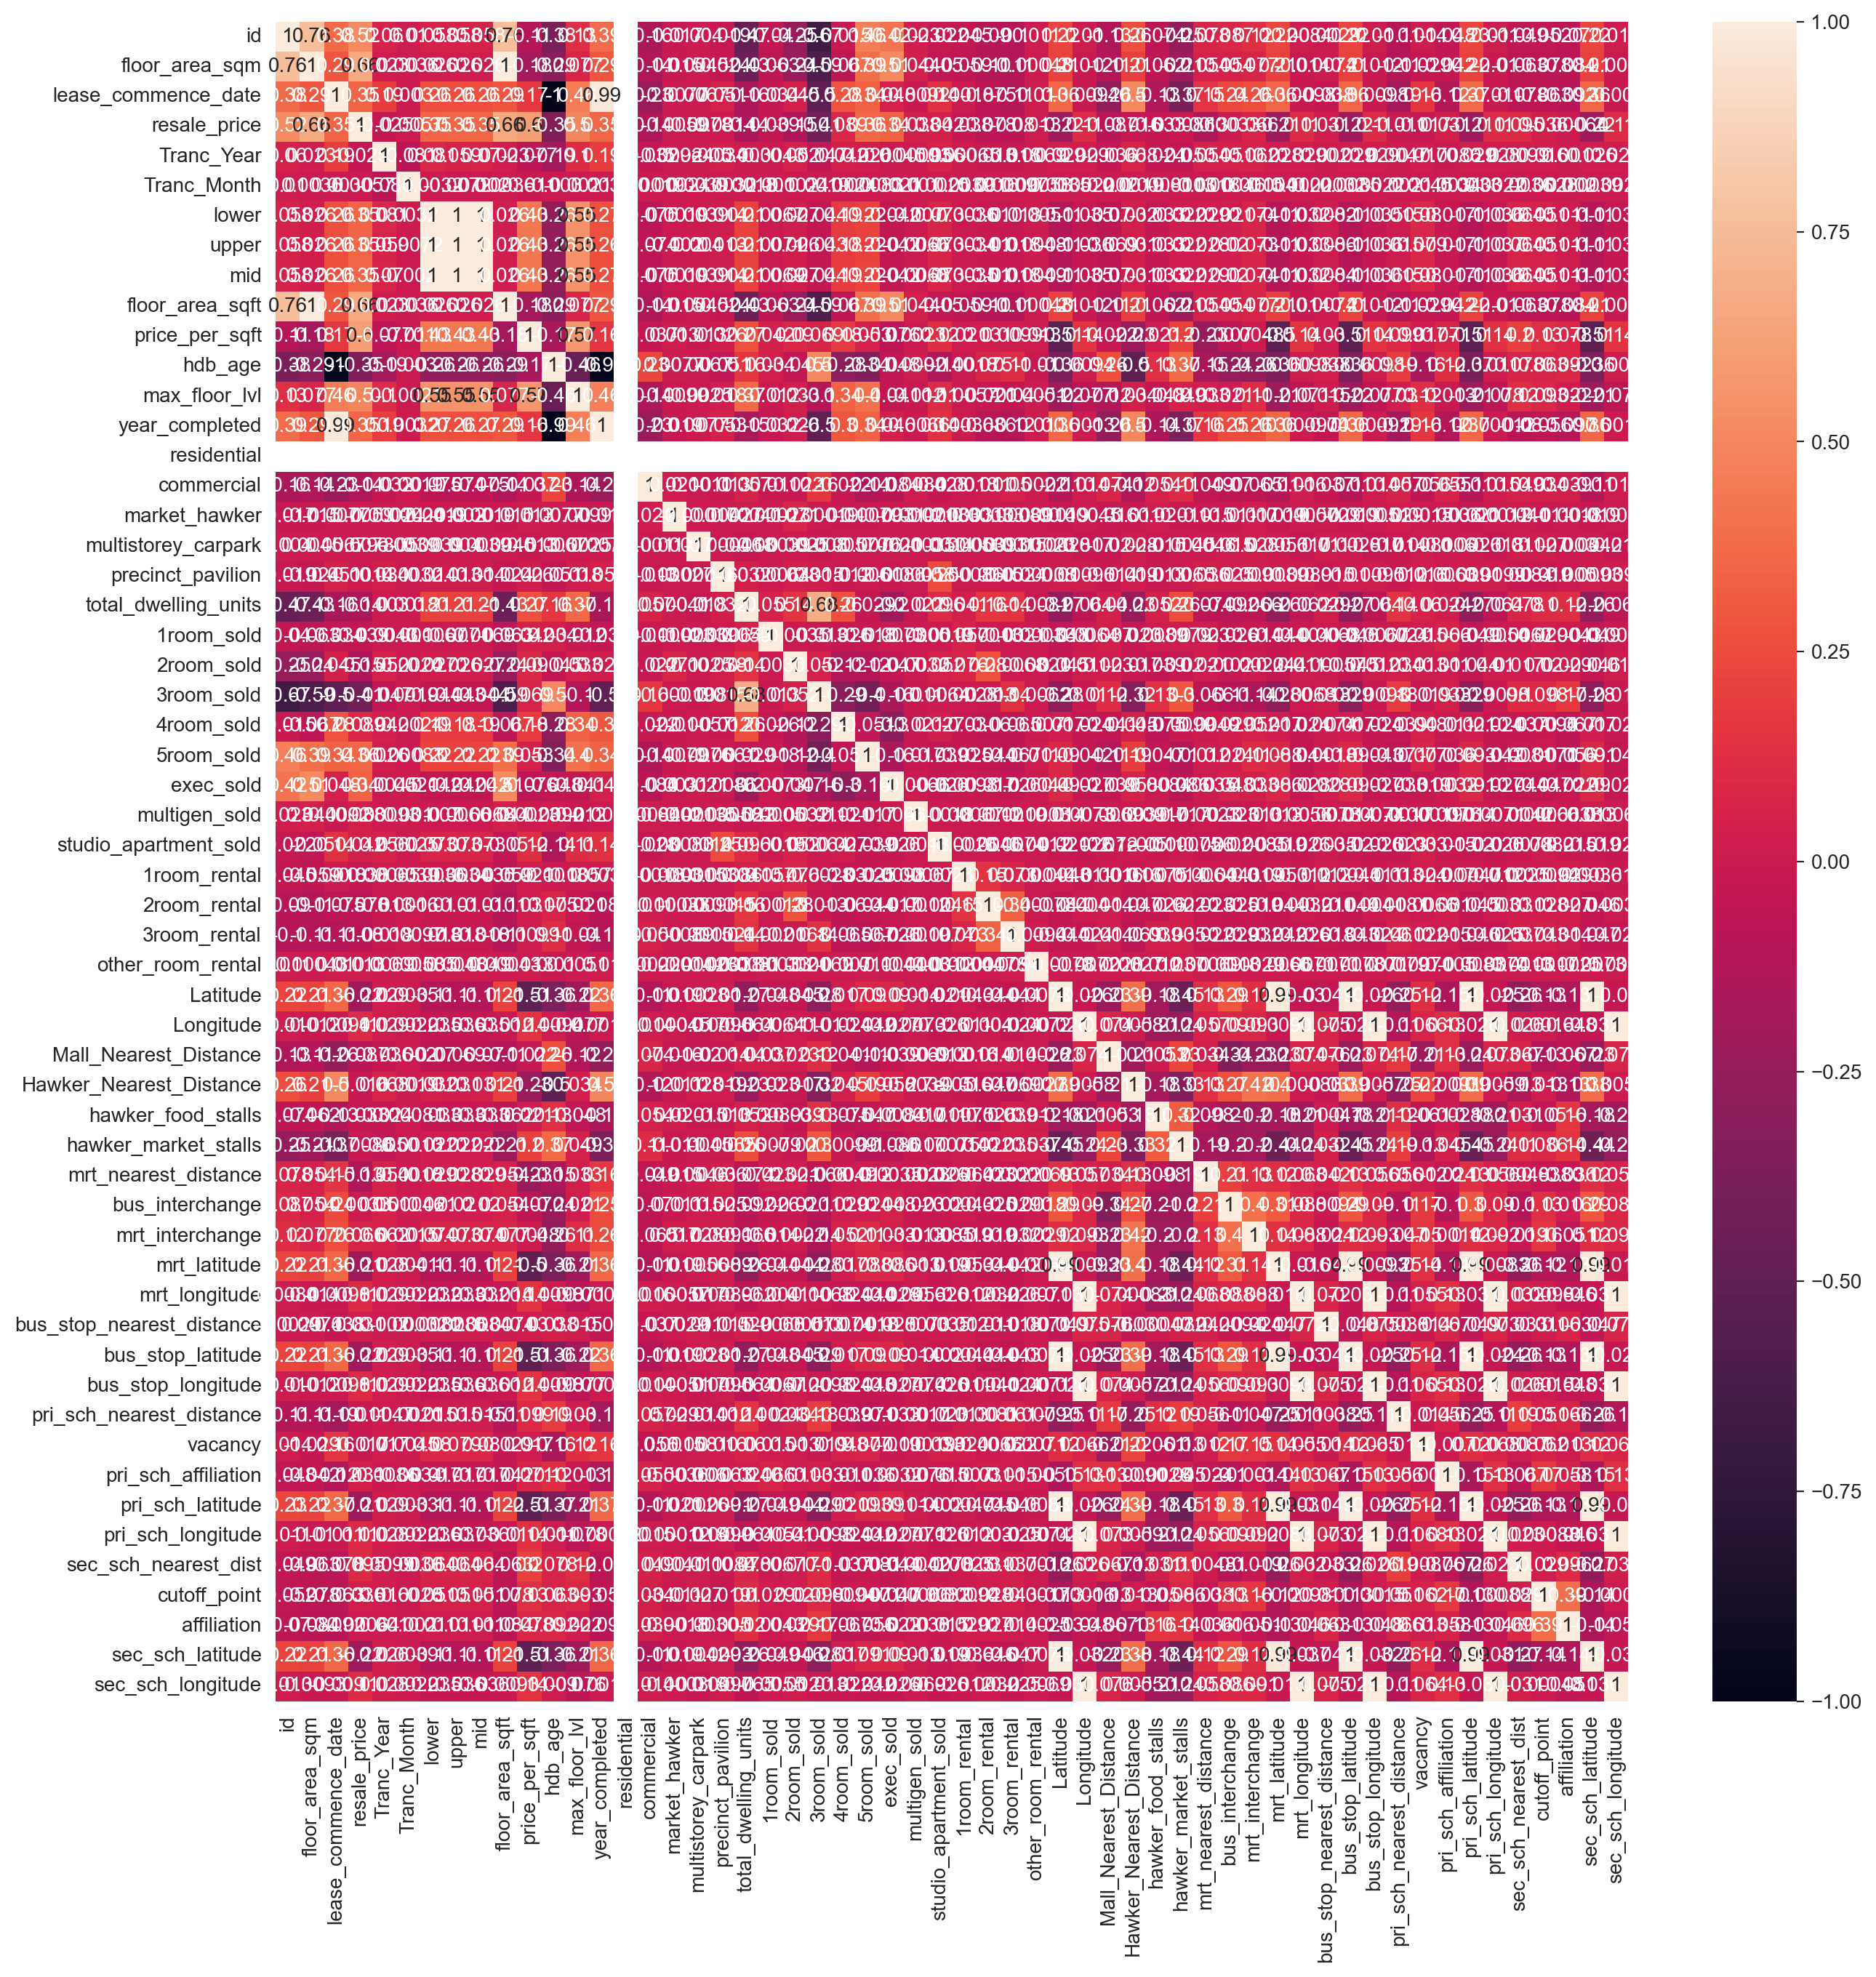

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

/var/folders/fp/6qfmbf013yzgt56bn7s48xbm0000gn/T/ipykernel_61258/759439316.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
/var/folders/fp/6qfmbf013yzgt56bn7s48xbm0000gn/T/ipykernel_61258/759439316.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, mask = matrix)


<AxesSubplot: >

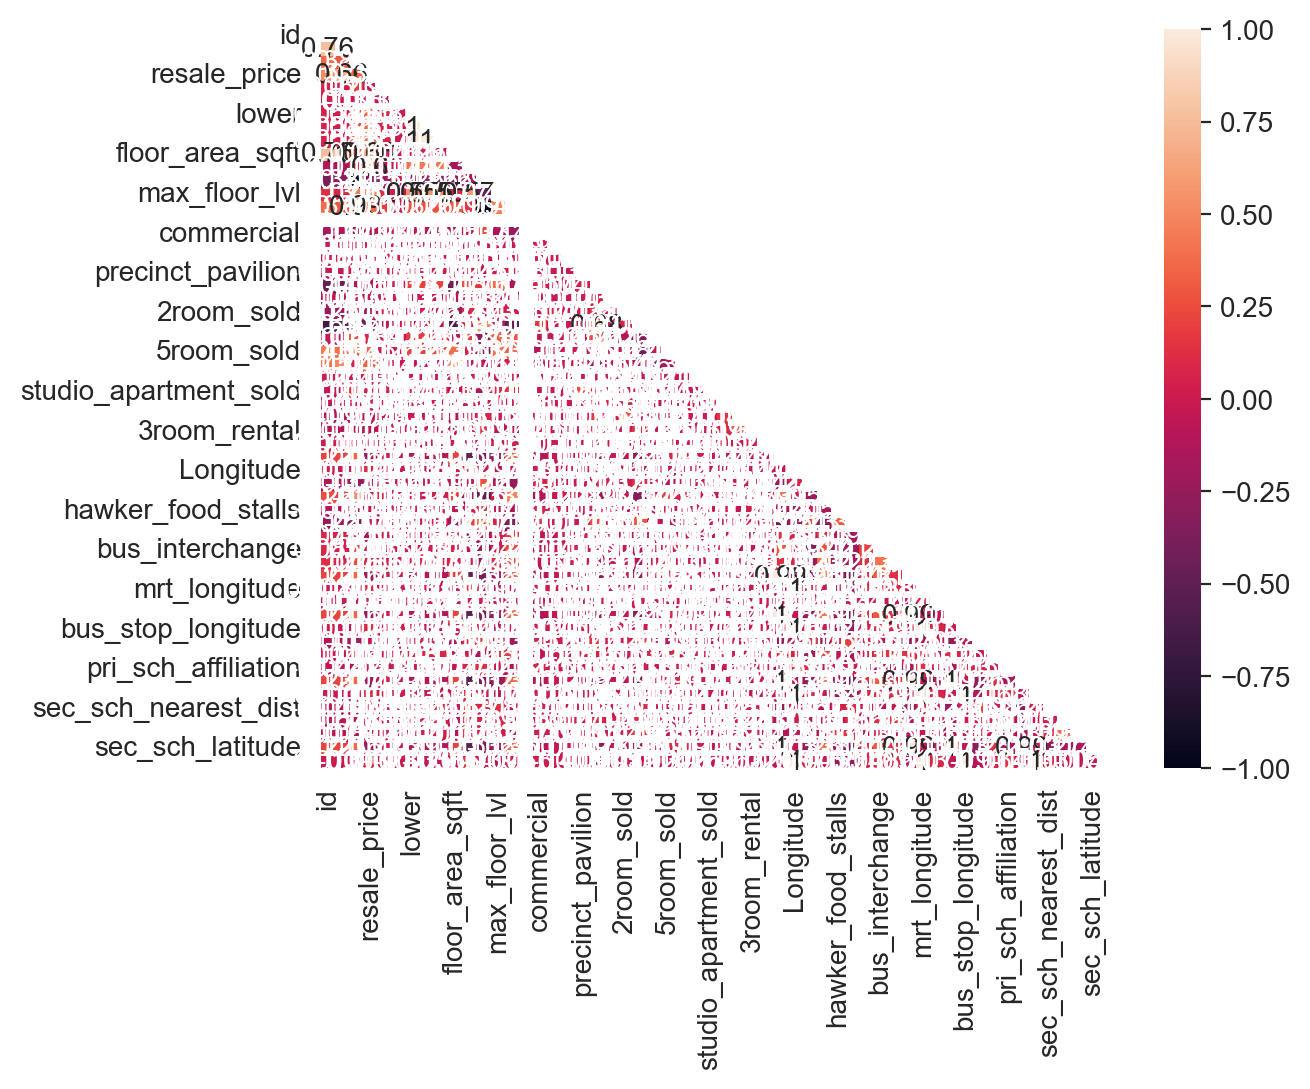

In [27]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask = matrix)

In [28]:
df.corr()['resale_price'].sort_values()

/var/folders/fp/6qfmbf013yzgt56bn7s48xbm0000gn/T/ipykernel_61258/2558022000.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['resale_price'].sort_values()


3room_sold                  -0.411948
hdb_age                     -0.348430
sec_sch_latitude            -0.215802
Latitude                    -0.215651
bus_stop_latitude           -0.215276
mrt_latitude                -0.214350
pri_sch_latitude            -0.214206
2room_sold                  -0.146455
total_dwelling_units        -0.144782
commercial                  -0.139708
mrt_nearest_distance        -0.127939
Mall_Nearest_Distance       -0.087096
3room_rental                -0.080059
2room_rental                -0.077612
1room_sold                  -0.039488
1room_rental                -0.037992
hawker_food_stalls          -0.032899
Tranc_Year                  -0.024679
vacancy                     -0.017042
Hawker_Nearest_Distance     -0.016078
pri_sch_nearest_distance    -0.010871
hawker_market_stalls        -0.008555
multistorey_carpark         -0.007767
market_hawker               -0.005925
Tranc_Month                 -0.005685
precinct_pavilion           -0.001367
affiliation 

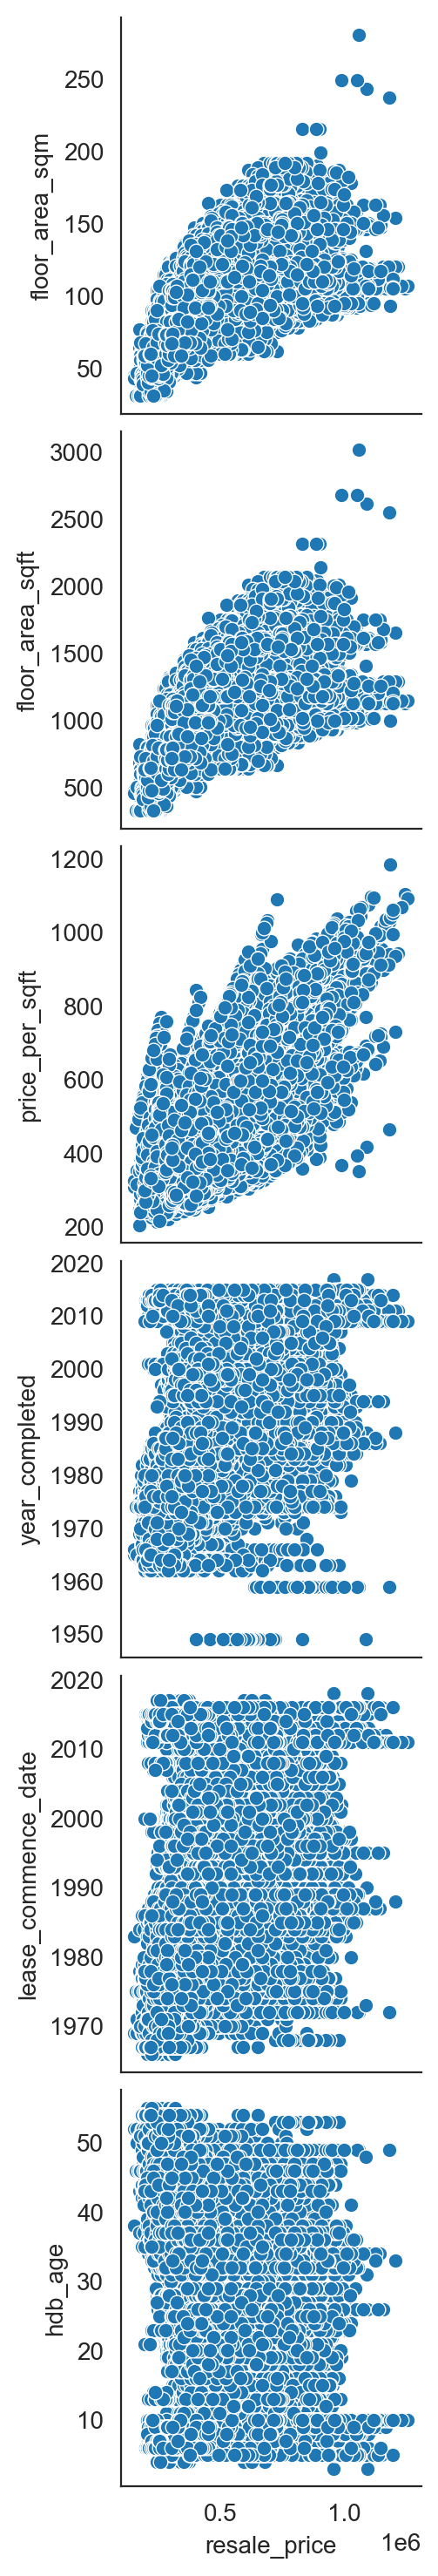

In [29]:
sns.pairplot(df, y_vars=['floor_area_sqm', 'floor_area_sqft', 'price_per_sqft', 'year_completed', 'lease_commence_date','hdb_age'], x_vars=['resale_price'])

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'floor_area_sqm'}>,
        <AxesSubplot: title={'center': 'lease_commence_date'}>,
        <AxesSubplot: title={'center': 'resale_price'}>,
        <AxesSubplot: title={'center': 'Tranc_Year'}>,
        <AxesSubplot: title={'center': 'Tranc_Month'}>,
        <AxesSubplot: title={'center': 'lower'}>],
       [<AxesSubplot: title={'center': 'upper'}>,
        <AxesSubplot: title={'center': 'mid'}>,
        <AxesSubplot: title={'center': 'floor_area_sqft'}>,
        <AxesSubplot: title={'center': 'price_per_sqft'}>,
        <AxesSubplot: title={'center': 'hdb_age'}>,
        <AxesSubplot: title={'center': 'max_floor_lvl'}>,
        <AxesSubplot: title={'center': 'year_completed'}>],
       [<AxesSubplot: title={'center': 'residential'}>,
        <AxesSubplot: title={'center': 'commercial'}>,
        <AxesSubplot: title={'center': 'market_hawker'}>,
        <AxesSubplot: title={'center': 'multistorey_car

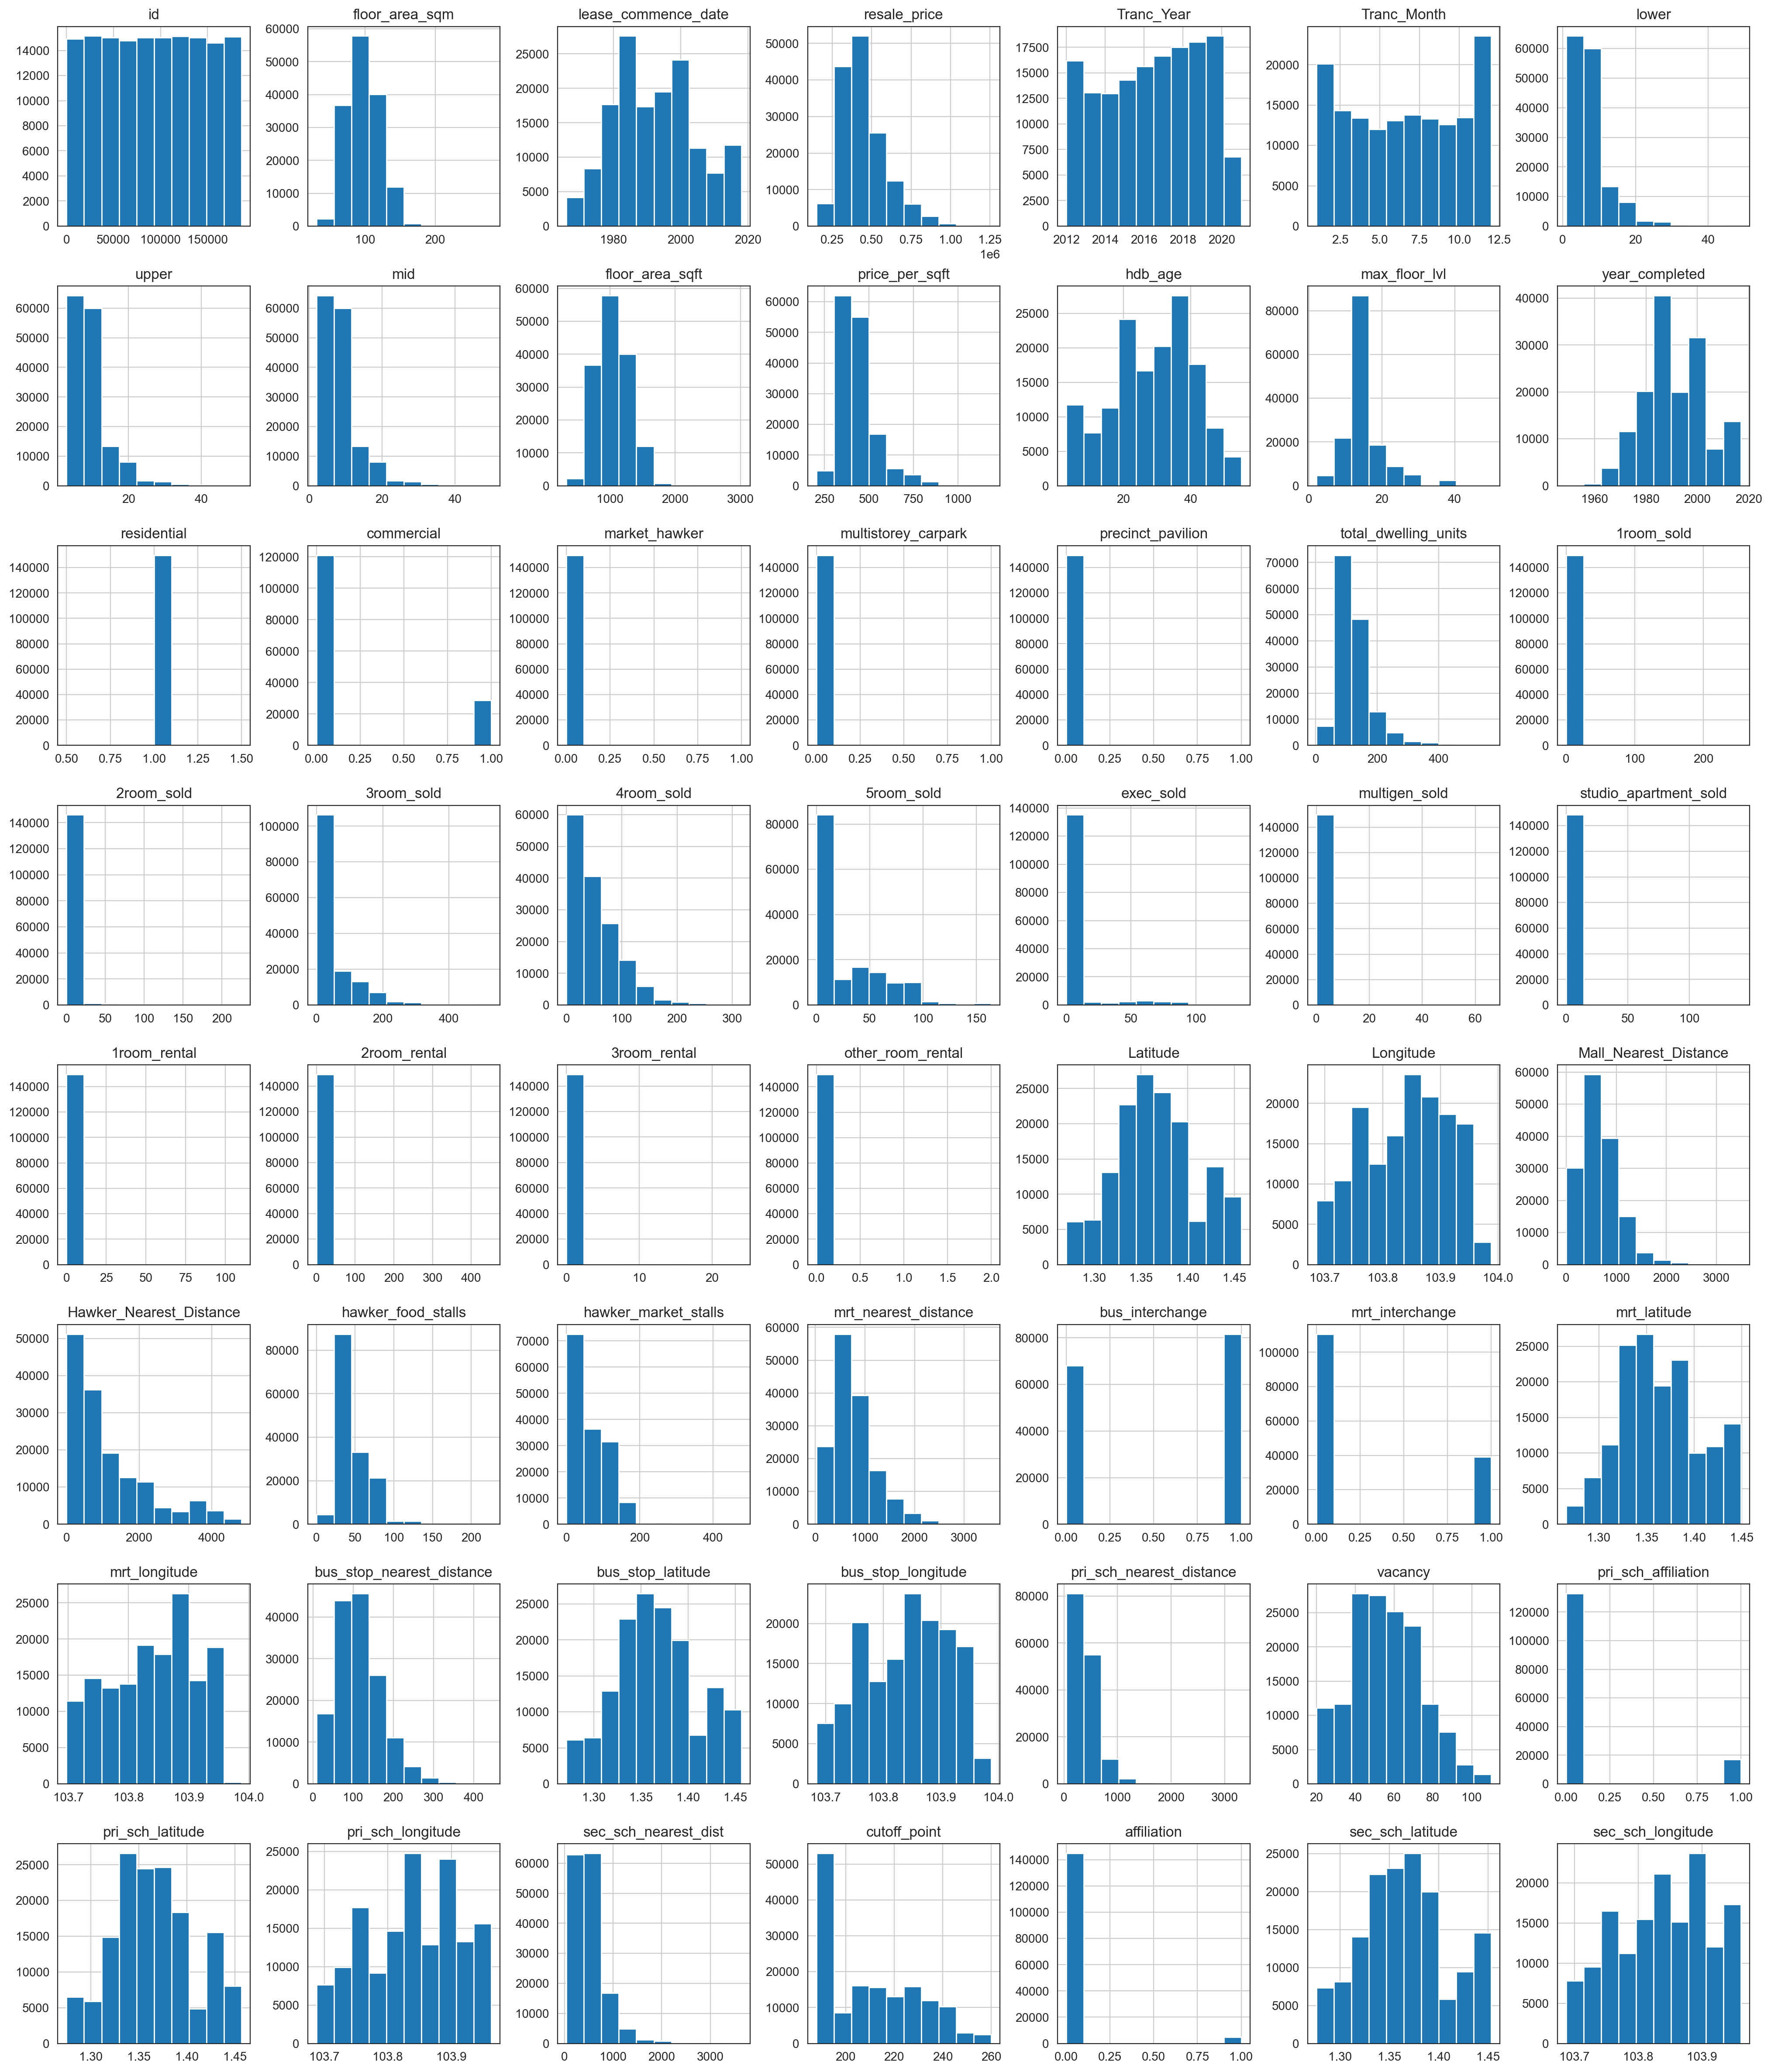

In [30]:
df.hist(figsize=(25, 30))

<AxesSubplot: >

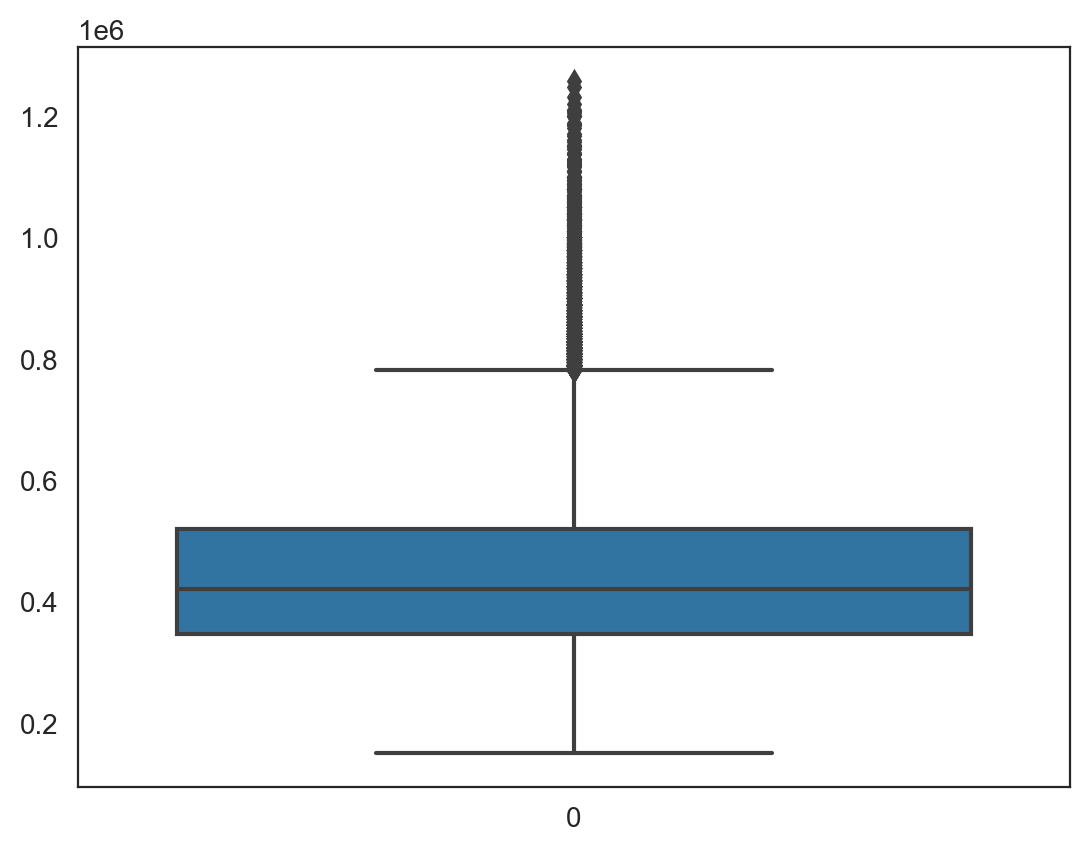

In [31]:
sns.boxplot(df['resale_price'])

<AxesSubplot: >

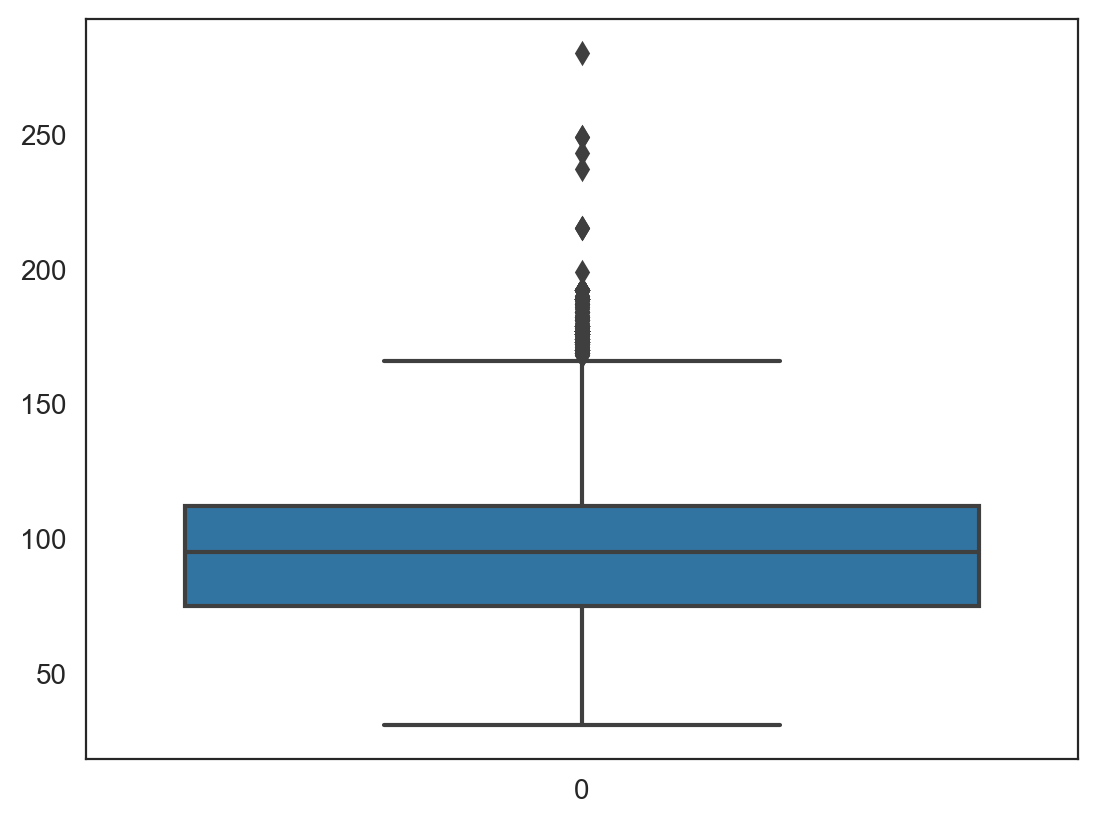

In [32]:
sns.boxplot(df['floor_area_sqm'])

In [33]:
#filter the 1st list of related features

df_filtered_1 = df.filter(items=['town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'Tranc_Year', 'Tranc_Month', 'mid_storey', 'lower',
       'upper', 'mid', 'full_flat_type'])

df_filtered_1.head()

town  flat_type block       street_name storey_range  \
0  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD     10 TO 12   
1           BISHAN     5 ROOM   153      BISHAN ST 13     07 TO 09   
2      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25     13 TO 15   
3           BISHAN     4 ROOM   232      BISHAN ST 22     01 TO 05   
4           YISHUN     4 ROOM   876      YISHUN ST 81     01 TO 03   

   floor_area_sqm  flat_model  lease_commence_date  resale_price  Tranc_Year  \
0            90.0     Model A                 2006      680000.0        2016   
1           130.0    Improved                 1987      665000.0        2012   
2           144.0   Apartment                 1997      838000.0        2013   
3           103.0     Model A                 1992      550000.0        2012   
4            83.0  Simplified                 1987      298000.0        2017   

   Tranc_Month  lower  upper  mid       full_flat_type  
0            5     10     12   11       4 ROOM Model A  
1            7      7      9    8      5 ROOM Improved  
2            7     13     15   14  EXECUTIVE Apartment  
3            4      1      5    3       4 ROOM Model A  
4           12      1      3    2    4 ROOM Simplified

/var/folders/fp/6qfmbf013yzgt56bn7s48xbm0000gn/T/ipykernel_61258/1818822691.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_filtered_1.corr().round(2)


<AxesSubplot: >

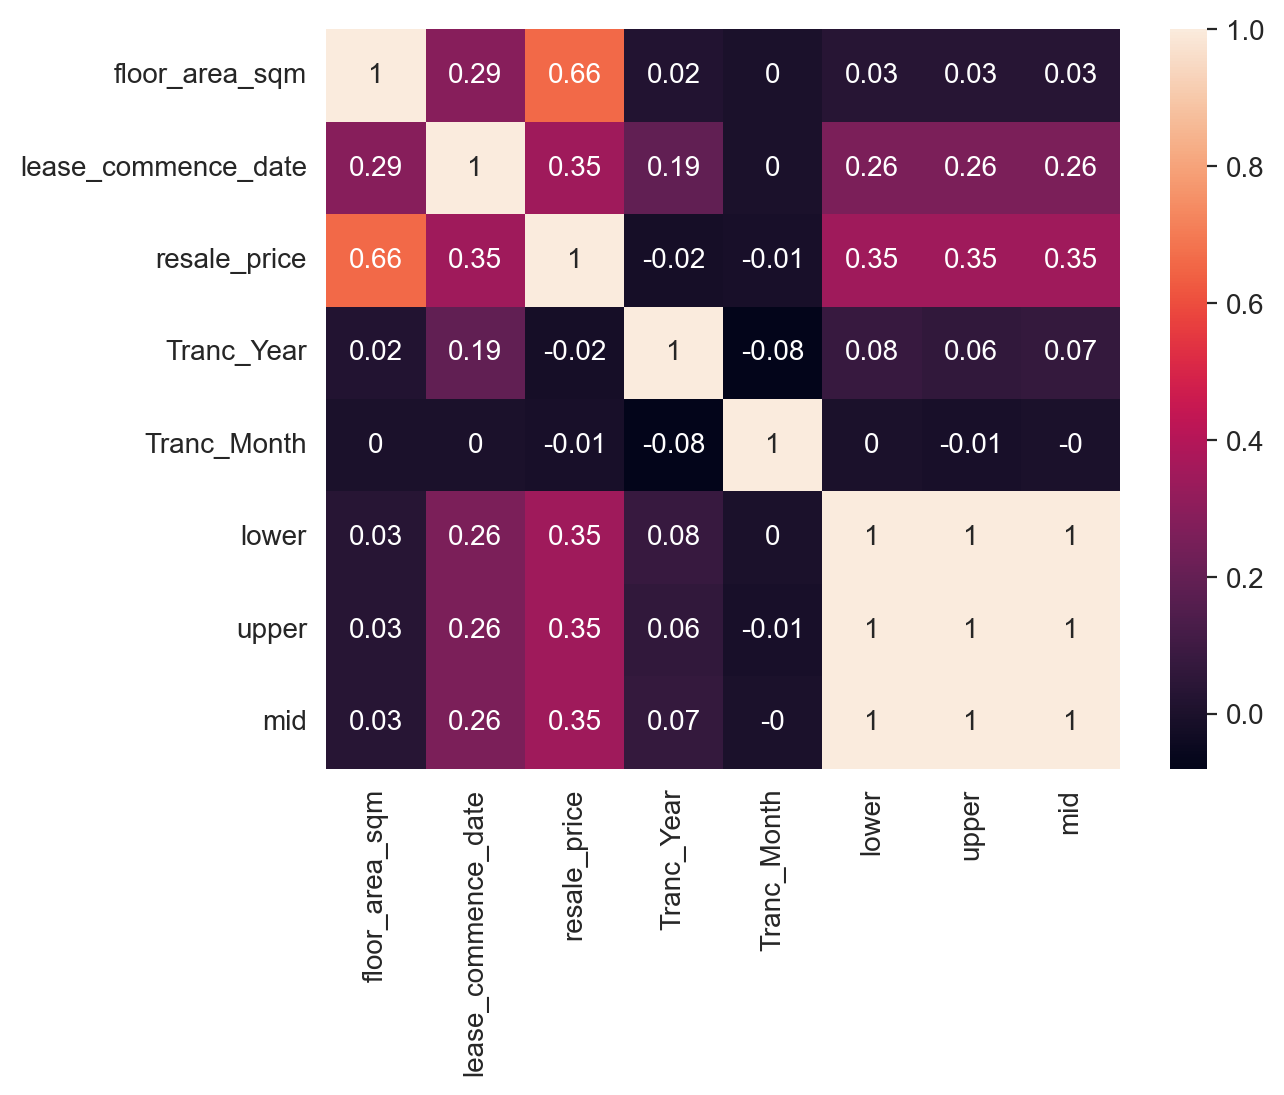

In [34]:
#find the corr of the filtered features

corr_matrix = df_filtered_1.corr().round(2)
sns.heatmap(data=corr_matrix, annot = True)

/var/folders/fp/6qfmbf013yzgt56bn7s48xbm0000gn/T/ipykernel_61258/90423983.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df_filtered_1.corr())
/var/folders/fp/6qfmbf013yzgt56bn7s48xbm0000gn/T/ipykernel_61258/90423983.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_filtered_1.corr(), annot=True, mask = matrix)


<AxesSubplot: >

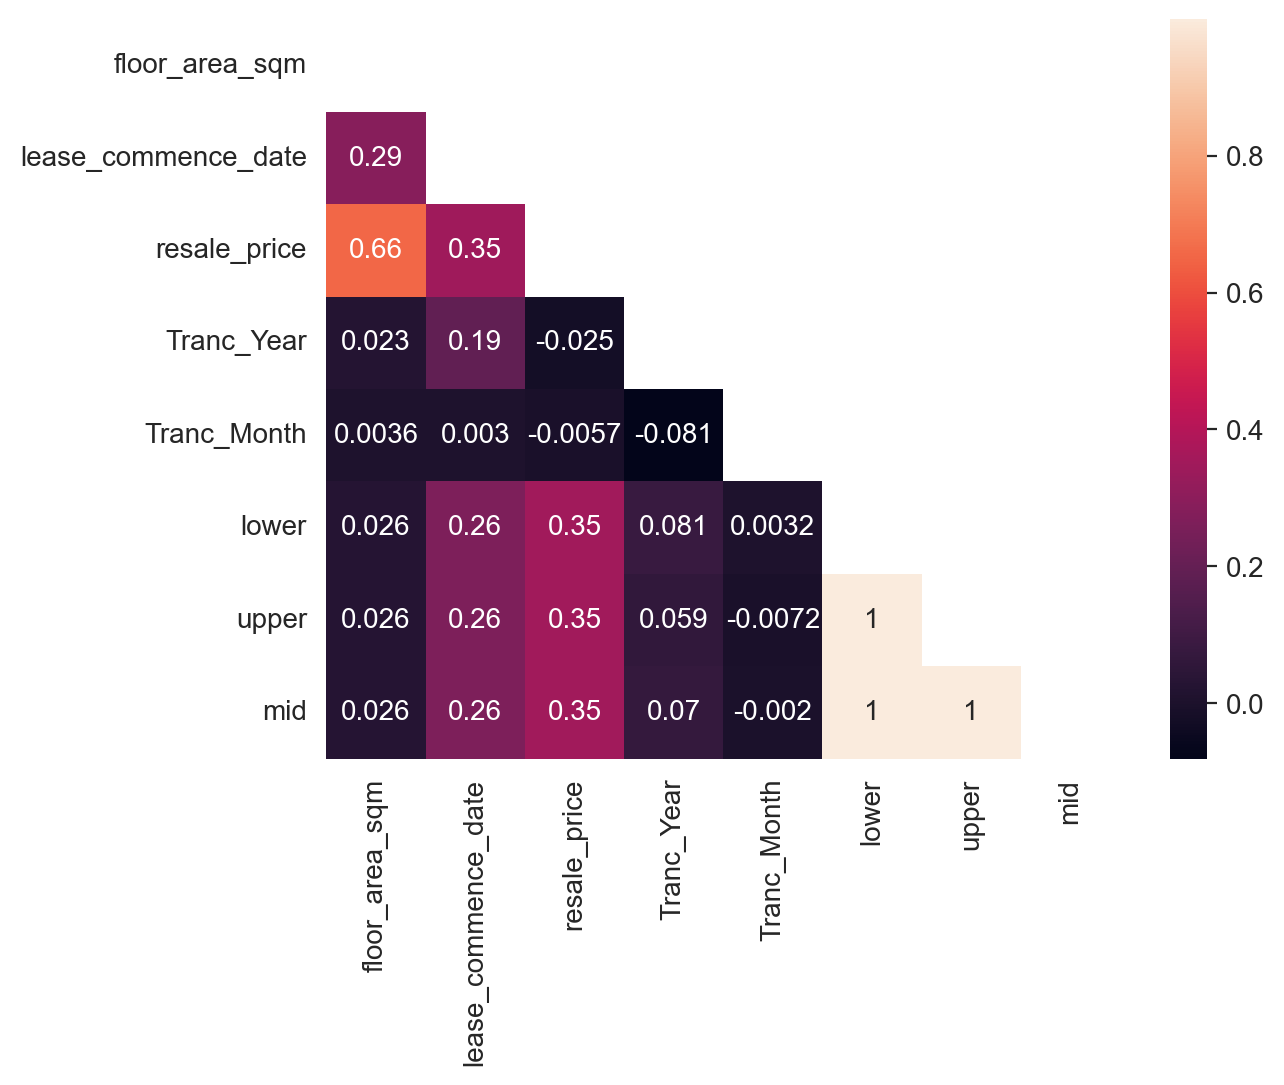

In [35]:
matrix = np.triu(df_filtered_1.corr())
sns.heatmap(df_filtered_1.corr(), annot=True, mask = matrix)

## Example Test Features = floor area sqm and lease commence date

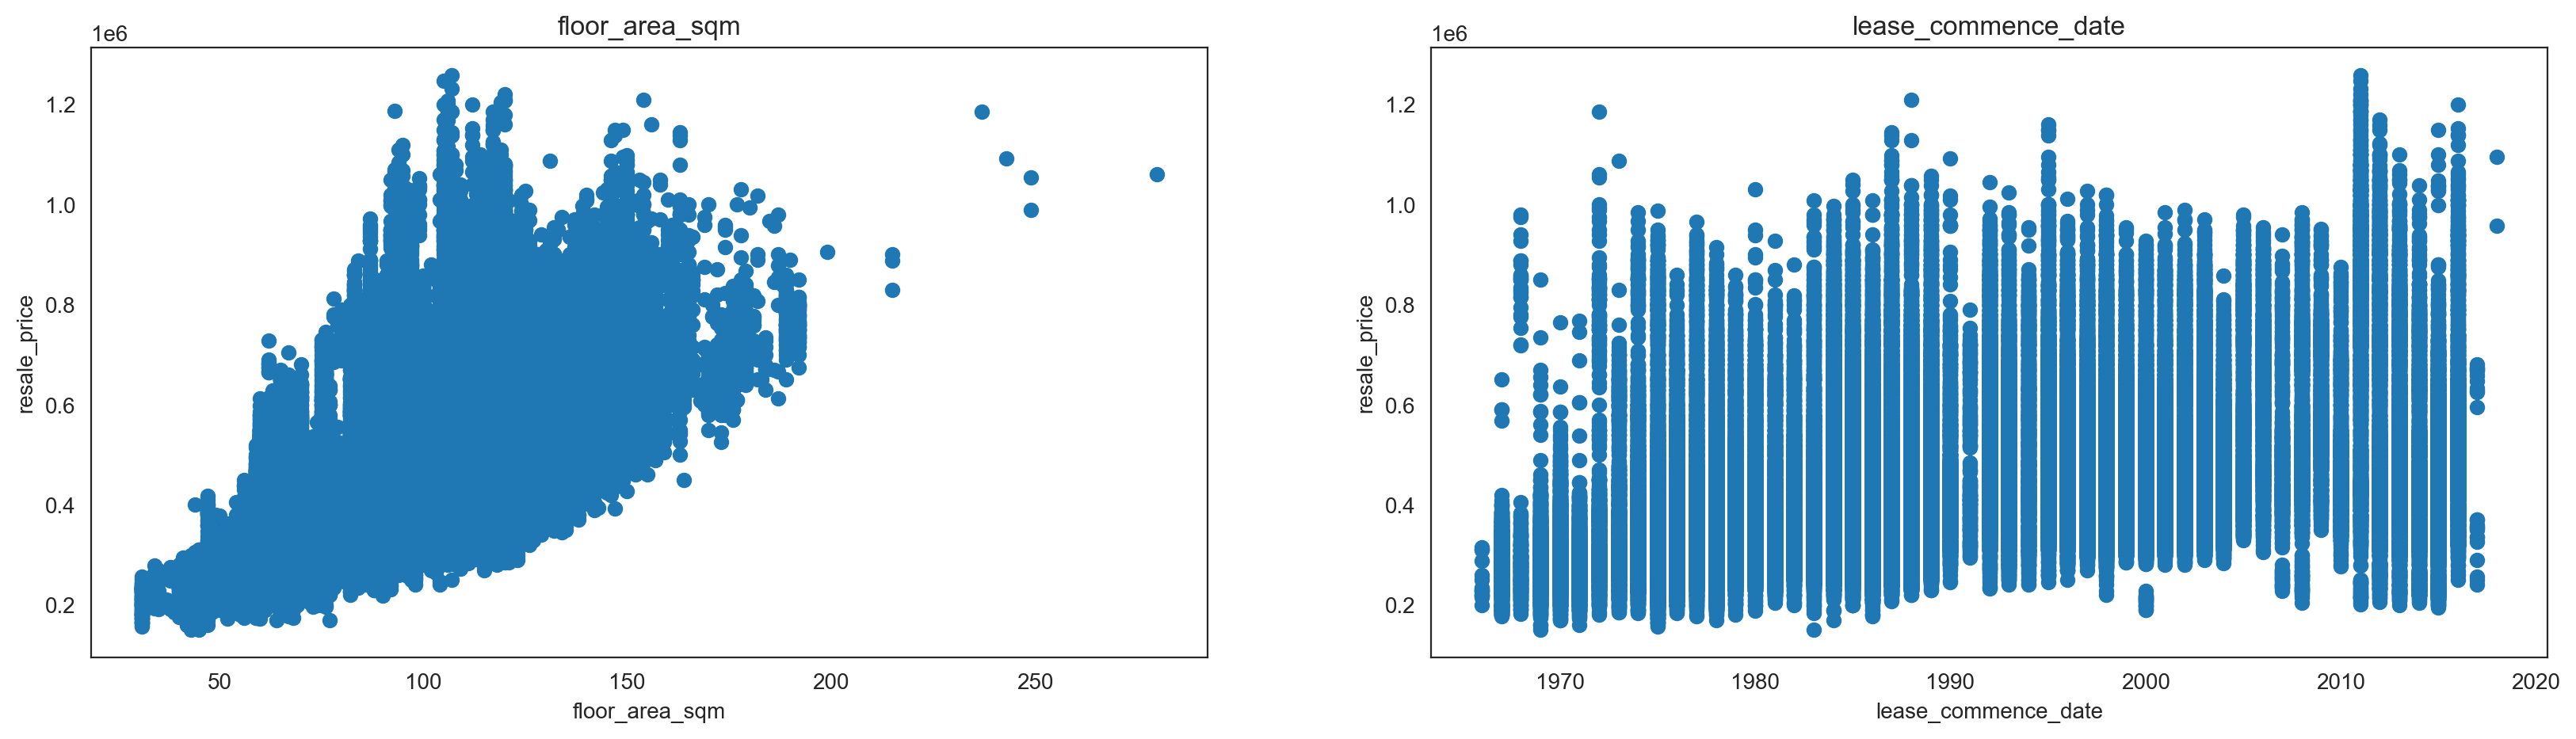

In [36]:
#test 2 features against the resale price based on the correlation

plt.figure(figsize=(20,5))

features = ['floor_area_sqm','lease_commence_date']
target = df_filtered_1['resale_price']

for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    x=df_filtered_1[col]
    y=target
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('resale_price')

In [37]:
X = pd.DataFrame(np.c_[df['floor_area_sqm'],df['lease_commence_date']],columns=['floor_area_sqm','lease_commence_date'])
y = df['resale_price']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5 )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(119844, 2)
(119844,)
(29961, 2)
(29961,)


In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
lr.score(X_train, y_train)

0.45787275477992806

In [41]:
lr.score(X_test, y_test)

0.46234751058983836

In [42]:
cross_val_score=cross_val_score(lr, X_train, y_train).mean()

In [43]:
#evaluate model w mean squared error and r2 for training set

y_train_predict = lr.predict(X_train)
mse_train = metrics.mean_squared_error(y_train,y_train_predict)
r2_train = metrics.r2_score(y_train,y_train_predict)

print(f'The model performance training set for MSE is {mse_train}.')
print(f'The model performance training set for R2 score is {r2_train}.')

The model performance training set for MSE is 11120294414.131918.
The model performance training set for R2 score is 0.45787275477992806.


In [44]:
y_test_predict = lr.predict(X_test)
mse_test = metrics.mean_squared_error(y_test,y_test_predict)
r2_test = metrics.r2_score(y_test,y_test_predict)

print(f'The model performance testing set for MSE is {mse_test}.')
print(f'The model performance testing set for R2 score is {r2_test}.')

The model performance testing set for MSE is 11021309691.24651.
The model performance testing set for R2 score is 0.46234751058983836.


In [45]:
print('In summary:')
print(f'The model performance training set for R2 score is {r2_train}.')
print(f'The model performance testing set for R2 score is {r2_test}.')
print(f'The model performance training set for cross val score is {cross_val_score}.')
print(f'Considering the test score is {r2_test} and cross val score is {cross_val_score} is similar, it suggest a representative test set.')

In summary:
The model performance training set for R2 score is 0.45787275477992806.
The model performance testing set for R2 score is 0.46234751058983836.
The model performance training set for cross val score is 0.4578350416492164.
Considering the test score is 0.46234751058983836 and cross val score is 0.4578350416492164 is similar, it suggest a representative test set.
